<a href="https://colab.research.google.com/github/Sachira-Heshan/omic-data-and-machine-learning-in-the-identification-of-coronary-artery-disease/blob/main/rna_data/build_xgboost_models_with_rna_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Research/Datasets/Cleaned/cleaned-non-normalized-dataset-GSE208194.xlsx')

In [3]:
df

,Unnamed: 0,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,...,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1,target_value
0,0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,...,2.951689,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.543410,8.361870,1
1,1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.433910,1.512845,3.252381,...,69.319858,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659,1
2,2,1.402110,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,...,6.950649,12.663118,18.383923,36.159325,17.106360,11.492971,7.379778,9.731645,2.560132,1
3,3,7.667875,10.225812,15.799738,1.526812,35.444900,51.141639,17.521034,6.539876,13.176043,...,67.810987,88.524134,34.275493,125.344512,109.490990,40.763492,67.437197,5.939315,4.123530,1
4,4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,...,12.891301,24.227999,39.581215,111.782471,33.096990,23.798352,17.519094,13.911370,5.092169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,25.222543,17.525907,89.995748,7.899247,28.691720,55.245745,42.377442,64.245814,30.129237,...,15.547450,9.409992,10.441533,559.390098,23.370109,2.688918,23.094887,7.114563,4.563028,0
85,85,17.734630,10.903512,32.951226,11.006974,33.123814,56.911321,19.254234,5.987356,12.130276,...,22.100110,19.978202,31.744585,387.044359,34.169966,9.531408,19.040575,4.664343,10.941191,0
86,86,5.057123,1.257853,12.263058,6.447497,6.709470,271.525037,6.904848,13.699922,7.758268,...,1.974481,3.483134,27.933352,89.231794,5.444215,2.823952,1.324381,20.376778,7.220862,0
87,87,0.968332,1.025641,5.968981,2.786651,1.214385,154.849235,10.530023,3.465649,4.376058,...,1.428419,4.340778,15.813597,27.761897,4.262073,0.107894,4.329463,1.601362,1.568828,1


In [4]:
dataset = df.drop(columns=["Unnamed: 0"])

In [5]:
dataset

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1,target_value
0,2.398878,3.324077,12.037059,1.287932,2.914606,106.458644,7.243743,3.443131,6.531775,79.598523,...,2.951689,2.780988,22.090146,38.558169,1.446729,8.543461,3.392143,8.543410,8.361870,1
1,12.157726,13.971038,1.453811,5.842868,32.566404,40.094091,22.433910,1.512845,3.252381,122.045223,...,69.319858,66.183243,79.348496,285.735258,101.312666,48.482781,57.089139,26.198111,3.218659,1
2,1.402110,1.917631,12.596614,1.412257,2.231871,124.158648,5.942053,8.835538,5.433218,48.646713,...,6.950649,12.663118,18.383923,36.159325,17.106360,11.492971,7.379778,9.731645,2.560132,1
3,7.667875,10.225812,15.799738,1.526812,35.444900,51.141639,17.521034,6.539876,13.176043,109.224603,...,67.810987,88.524134,34.275493,125.344512,109.490990,40.763492,67.437197,5.939315,4.123530,1
4,4.198525,2.847621,17.246205,7.261625,9.212083,71.778619,5.453753,4.370199,7.352974,108.900379,...,12.891301,24.227999,39.581215,111.782471,33.096990,23.798352,17.519094,13.911370,5.092169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,25.222543,17.525907,89.995748,7.899247,28.691720,55.245745,42.377442,64.245814,30.129237,237.696308,...,15.547450,9.409992,10.441533,559.390098,23.370109,2.688918,23.094887,7.114563,4.563028,0
85,17.734630,10.903512,32.951226,11.006974,33.123814,56.911321,19.254234,5.987356,12.130276,127.585057,...,22.100110,19.978202,31.744585,387.044359,34.169966,9.531408,19.040575,4.664343,10.941191,0
86,5.057123,1.257853,12.263058,6.447497,6.709470,271.525037,6.904848,13.699922,7.758268,110.033203,...,1.974481,3.483134,27.933352,89.231794,5.444215,2.823952,1.324381,20.376778,7.220862,0
87,0.968332,1.025641,5.968981,2.786651,1.214385,154.849235,10.530023,3.465649,4.376058,49.638060,...,1.428419,4.340778,15.813597,27.761897,4.262073,0.107894,4.329463,1.601362,1.568828,1


In [6]:
dataset.value_counts('target_value')

target_value
1    59
0    30
dtype: int64

In [7]:
dataset.describe()

,ENSG00000000419.12,ENSG00000000938.13,ENSG00000001629.10,ENSG00000001631.15,ENSG00000002549.12,ENSG00000002586.20,ENSG00000002834.18,ENSG00000003056.8,ENSG00000003147.19,ENSG00000003402.20,...,ENSG00000286021.2,ENSG00000286147.1,ENSG00000286171.1,ENSG00000286522.1,ENSG00000286834.1,ENSG00000287080.1,ENSG00000287160.1,ENSG00000287825.1,ENSG00000288560.1,target_value
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,6.705767,5.458282,16.293298,5.633802,12.178022,143.244946,14.379445,12.341014,7.957745,104.030906,...,13.182450,16.136554,39.622146,115.366401,23.960420,14.831590,13.749152,12.985347,8.296698,0.662921
std,6.515666,4.803042,12.963003,3.848453,12.802669,70.280351,6.197511,9.033995,4.931308,44.427685,...,15.424374,17.129849,23.286454,96.721380,25.217267,16.145139,15.309614,8.280604,7.374221,0.475390
min,0.000000,0.738855,0.593994,0.000000,0.596369,26.284603,4.811479,1.288969,1.510723,46.253597,...,0.000000,0.247386,9.452325,20.876753,0.821614,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430811,2.065489,9.129653,2.996809,4.181102,91.763039,10.257692,6.965170,4.440889,71.669809,...,2.658997,4.802419,23.030728,49.830760,6.341953,4.136503,3.346977,7.206719,2.594182,0.000000
50%,4.198525,3.667449,13.041689,4.881637,8.268794,127.976389,14.138267,10.446489,6.638466,91.512281,...,6.281984,8.405767,34.858209,87.889397,12.876901,9.081237,6.914010,11.709220,6.384252,1.000000
75%,9.111303,7.549874,18.335766,7.210163,14.405857,171.559862,17.012664,14.779458,10.821829,126.492253,...,17.564549,22.034903,49.791251,135.713716,34.169966,18.978194,20.332302,18.347209,11.581745,1.000000
max,37.598555,23.739851,89.995748,18.818766,92.040239,354.427928,42.377442,64.245814,30.129237,237.696308,...,69.319858,88.524134,146.213312,559.390098,110.209293,83.094421,67.437197,49.088410,32.838517,1.000000


In [8]:
dataset.shape

(89, 4151)

In [9]:
X = dataset.drop(columns=["target_value"])
y = dataset["target_value"]

In [10]:
X.shape

(89, 4150)

In [11]:
y.shape

(89,)

In [12]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate Mutual Information between each feature and the target variable
mi_scores = mutual_info_classif(X, y, discrete_features=[False]*X.shape[1])

# Create a dictionary that maps feature names to their MI scores
feature_mi_scores = {feature_name: mi_score for feature_name, mi_score in zip(X.columns, mi_scores)}

# Sort the features in ascending order of their MI scores
sorted_features_ascending = sorted(feature_mi_scores.items(), key=lambda x: x[1])

In [13]:
# Filter features with non-zero mutual information scores
selected_features = [feature_name for feature_name, mi_score in sorted_features_ascending if mi_score > 0]
# let's create new X with only these features
X_selected = X[selected_features]
X_selected.shape

(89, 3494)

In [14]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(100, 3600, 100)]
cross_val_k = [n for n in range(3, 11)]

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)
    X_MI_selected = mi_classif.fit_transform(X, y)
    selected_features = mi_classif.get_support()
    selected_feature_names = X.columns[selected_features]
    X_new = X[selected_feature_names]
    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset into a train set (80%) and a test set (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create an XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Perform cross-validation for various k-fold values
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores using XGBoost
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")
        print("")
    print("")


RESULTS FOR 100 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 100)
Accuracy of the 100 features XGBoost model is: 100.0%
Sensitivity for 100 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 100 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 100 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 1.         0.86206897]
Mean Accuracy: 94.291%
Standard Deviation: 5.876%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-V

In [16]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(250, 3600, 250)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 250 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 250)
Accuracy of the 250 features XGBoost model is: 100.0%
Sensitivity for 250 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 250 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 250 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 1.         0.86206897]
Mean Accuracy: 94.291%
Standard Deviation: 5.876%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-V

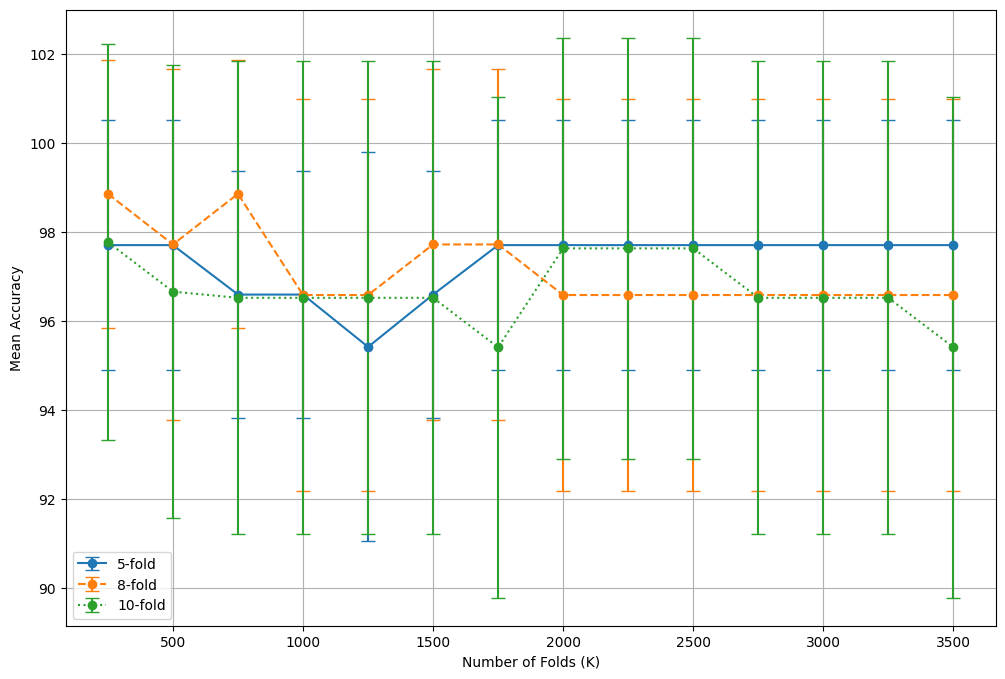

In [17]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(50, 400, 50)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 50 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 50)
Accuracy of the 50 features XGBoost model is: 100.0%
Sensitivity for 50 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 50 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 50 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 0.96666667 0.89655172]
Mean Accuracy: 94.33%
Standard Deviation: 3.305%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-Validati

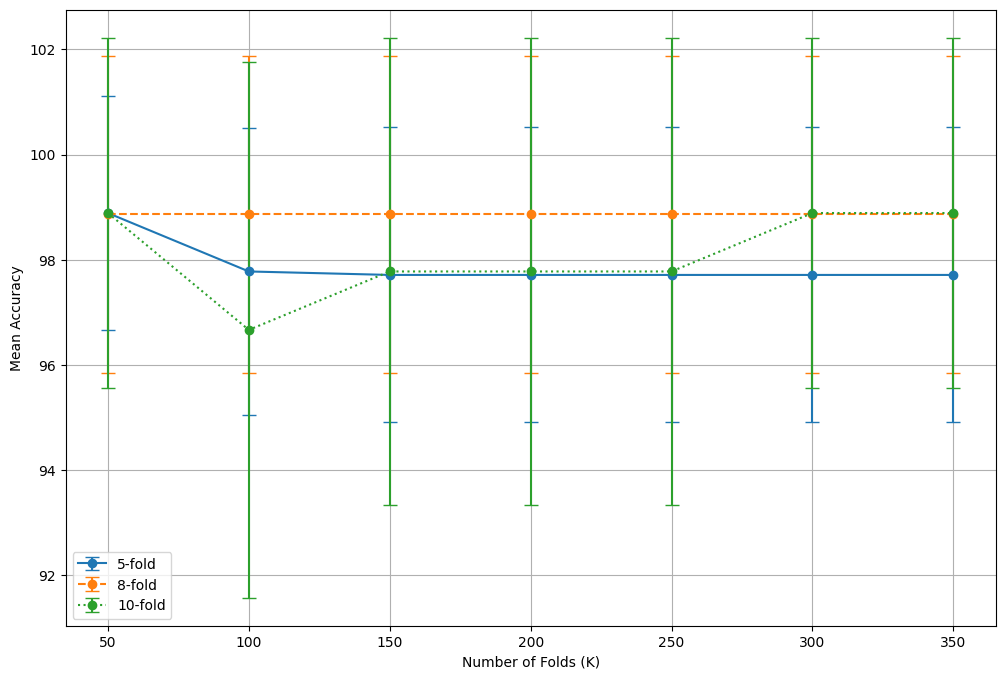

In [19]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(20, 80, 10)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 20 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 20)
Accuracy of the 20 features XGBoost model is: 94.444%
Sensitivity for 20 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 20 features XGBoost model is: 
[[ 4  1]
 [ 0 13]]
Classification report of 20 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.93      1.00      0.96        13

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 0.93333333 0.89655172]
Mean Accuracy: 93.218%
Standard Deviation: 2.864%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.90909091 0.90909091]
Mean Accuracy: 94.318%
Standard Deviation: 3.769%

5-fold Cross Validation
Cross-Valida

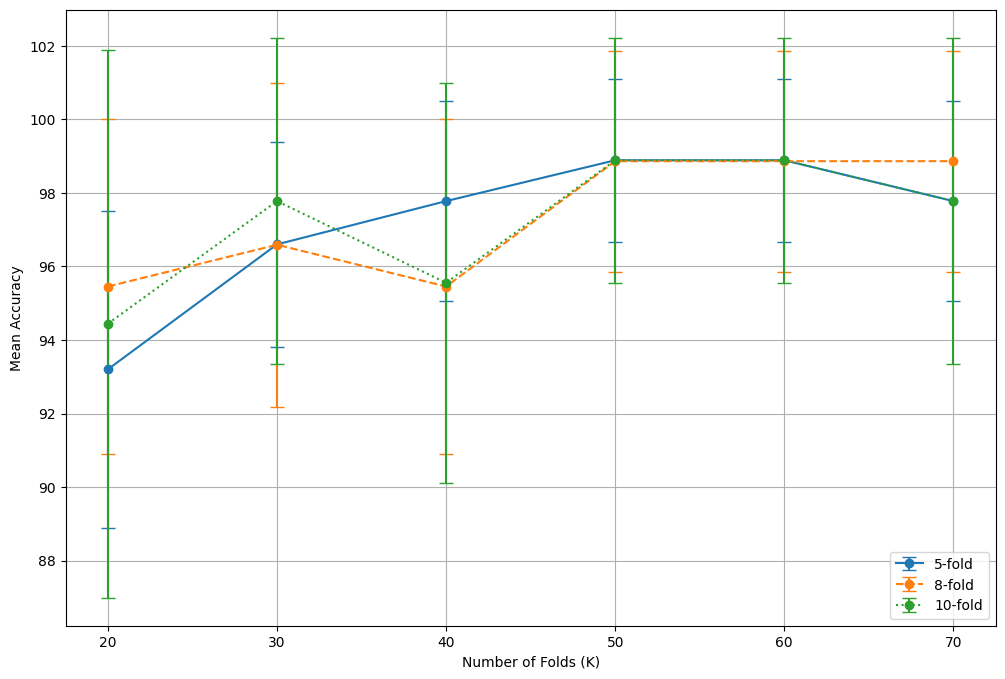

In [21]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [22]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(45, 70, 5)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 45 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 45)
Accuracy of the 45 features XGBoost model is: 100.0%
Sensitivity for 45 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 45 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 45 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 0.96666667 0.89655172]
Mean Accuracy: 94.33%
Standard Deviation: 3.305%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-Validati

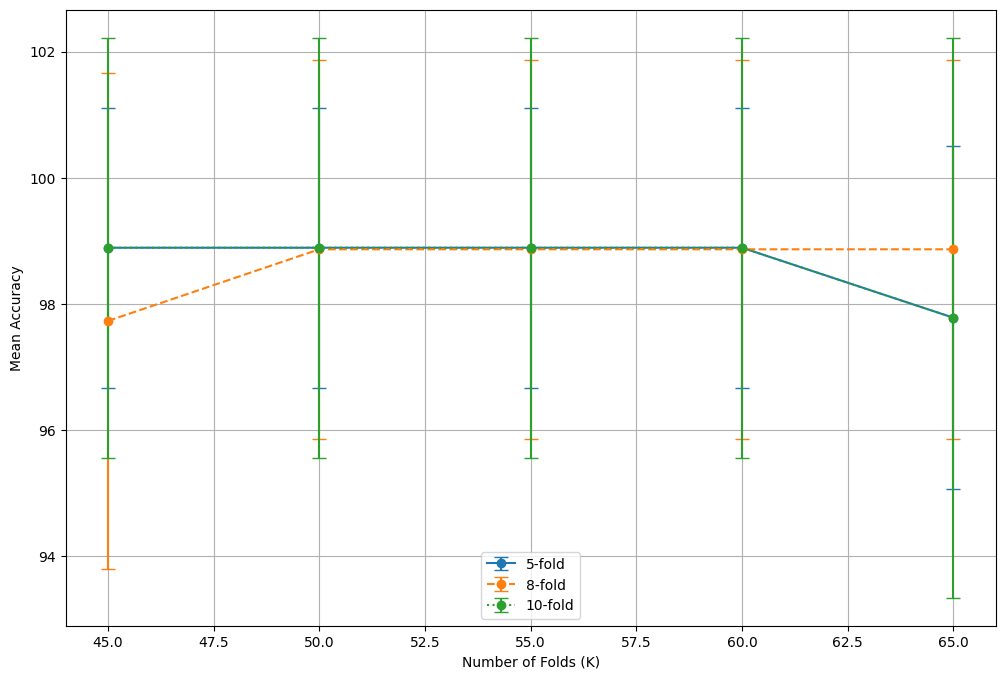

In [23]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [24]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(40, 52, 2)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 40 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 40)
Accuracy of the 40 features XGBoost model is: 100.0%
Sensitivity for 40 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 40 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 40 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 0.96666667 0.89655172]
Mean Accuracy: 94.33%
Standard Deviation: 3.305%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-Validati

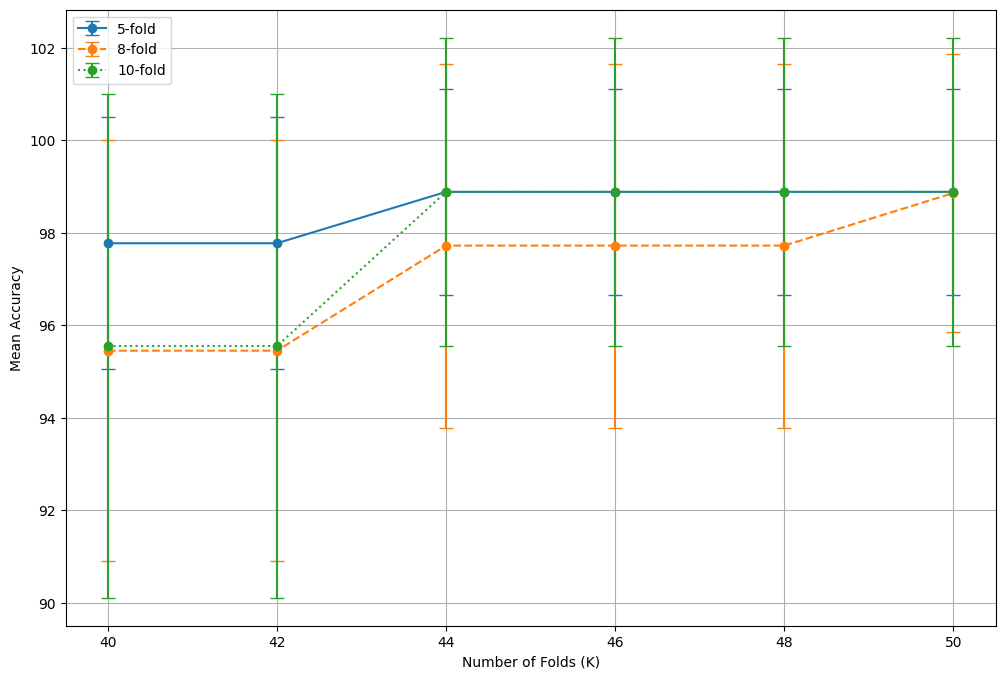

In [25]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [26]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [n for n in range(42, 47)]
cross_val_k = [n for n in range(3, 11)]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 42 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 42)
Accuracy of the 42 features XGBoost model is: 100.0%
Sensitivity for 42 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 42 features XGBoost model is: 
[[ 5  0]
 [ 0 13]]
Classification report of 42 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        13

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

3-fold Cross Validation
Cross-Validation Scores: [0.96666667 0.96666667 0.89655172]
Mean Accuracy: 94.33%
Standard Deviation: 3.305%

4-fold Cross Validation
Cross-Validation Scores: [1.         0.95454545 0.95454545 0.90909091]
Mean Accuracy: 95.455%
Standard Deviation: 3.214%

5-fold Cross Validation
Cross-Validati

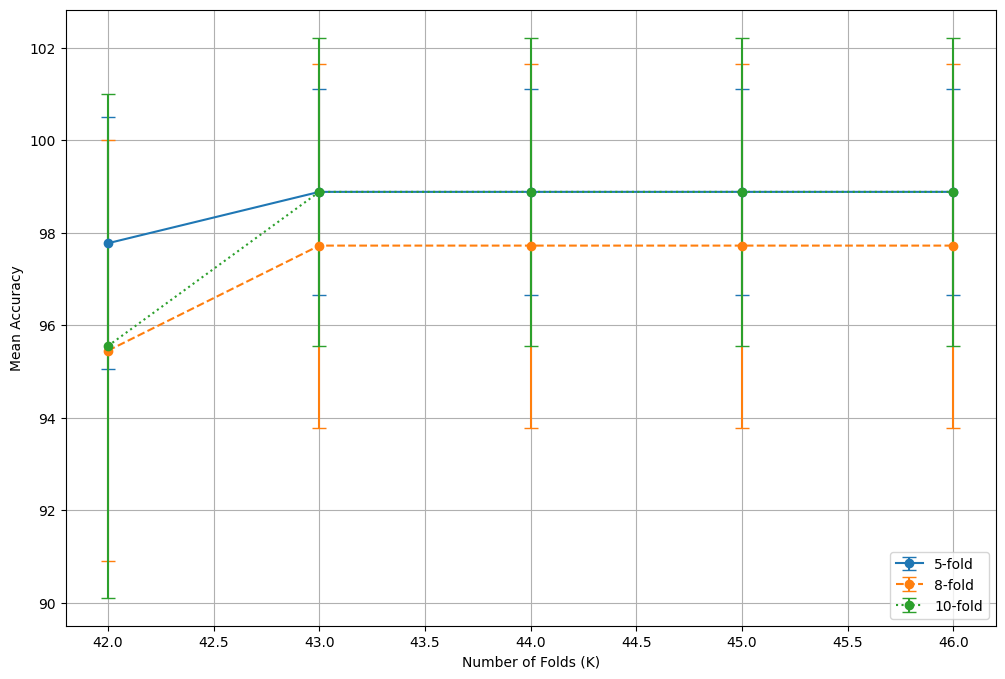

In [27]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [28]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

no_of_features = [20, 43, 100, 300, 500, 1000, 1500, 2000, 2500, 3000]
cross_val_k = [5, 8, 10]
results = {}

for feature_count in no_of_features:
    print(f"RESULTS FOR {feature_count} FEATURES")
    print("--------------------------------------------------")

    results[feature_count] = {}

    # Feature selection using mutual information
    mi_classif = SelectKBest(score_func=mutual_info_classif, k=feature_count)

    # Apply the mutual information selector on the dataset
    X_MI_selected = mi_classif.fit_transform(X, y)

    # Get the selected features
    selected_features = mi_classif.get_support()

    # Feature names of selected features
    selected_feature_names = X.columns[selected_features]

    X_new = X[selected_feature_names]

    print("Shape of X_new: ", X_new.shape)

    # Divide the dataset to train 0.8 and test 0.2
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Create XGBoost classifier and fit the data
    xgb_classif = XGBClassifier()
    xgb_classif.fit(X_train, y_train)

    # Test the model on the test set
    y_pred = xgb_classif.predict(X_test)

    # Check the accuracy of the model
    accuracy_xgb_model = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the {feature_count} features XGBoost model is: {round(accuracy_xgb_model * 100, 3)}%")

    results[feature_count]["accuracy"] = round(accuracy_xgb_model * 100, 3)

    # Confusion matrix of the model
    confusion_matrix_xgb_model = confusion_matrix(y_test, y_pred)

    TP_xgb_model = confusion_matrix_xgb_model[1, 1]  # True Positives
    FN_xgb_model = confusion_matrix_xgb_model[1, 0]  # False Negatives

    # Calculate Sensitivity (True Positive Rate or Recall)
    sensitivity_xgb_model = TP_xgb_model / (TP_xgb_model + FN_xgb_model)
    print(f"Sensitivity for {feature_count} features XGBoost model (True Positive Rate): {round(sensitivity_xgb_model * 100, 3)}%")

    results[feature_count]["sensitivity"] = round(sensitivity_xgb_model * 100, 3)

    # Print the confusion matrix
    print(f"Confusion matrix of the {feature_count} features XGBoost model is: ")
    print(confusion_matrix_xgb_model)

    # Classification report for the model
    report_xgb_model = classification_report(y_test, y_pred)
    print(f"Classification report of {feature_count} features XGBoost model is: ")
    print(report_xgb_model)

    # Now let's do the cross-validation
    for k in cross_val_k:
        print(f"{k}-fold Cross Validation")

        results[feature_count][f"{k}-fold-CV"] = {}

        # Create a cross-validation object (K-Fold cross-validator)
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        # Perform k-fold cross-validation and get the cross-validation scores
        # We use accuracy as the scoring metric here
        scores = cross_val_score(xgb_classif, X_new, y, cv=kf, scoring='accuracy')

        # Print the cross-validation scores
        print("Cross-Validation Scores:", scores)

        # Calculate and print the mean and standard deviation of the scores
        print(f"Mean Accuracy: {round(scores.mean() * 100, 3)}%")
        print(f"Standard Deviation: {round(scores.std() * 100, 3)}%")

        results[feature_count][f"{k}-fold-CV"]["mean-accuracy"] = round(scores.mean() * 100, 3)
        results[feature_count][f"{k}-fold-CV"]["standard-deviation"] = round(scores.std() * 100, 3)

        print("")
    print("")


RESULTS FOR 20 FEATURES
--------------------------------------------------
Shape of X_new:  (89, 20)
Accuracy of the 20 features XGBoost model is: 94.444%
Sensitivity for 20 features XGBoost model (True Positive Rate): 100.0%
Confusion matrix of the 20 features XGBoost model is: 
[[ 4  1]
 [ 0 13]]
Classification report of 20 features XGBoost model is: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.93      1.00      0.96        13

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18

5-fold Cross Validation
Cross-Validation Scores: [0.94444444 0.94444444 1.         0.88888889 0.88235294]
Mean Accuracy: 93.203%
Standard Deviation: 4.303%

8-fold Cross Validation
Cross-Validation Scores: [1.         0.90909091 0.90909091 1.         0.90909091 0.90909091
 1.         1.        ]
Mean Accuracy: 95.45

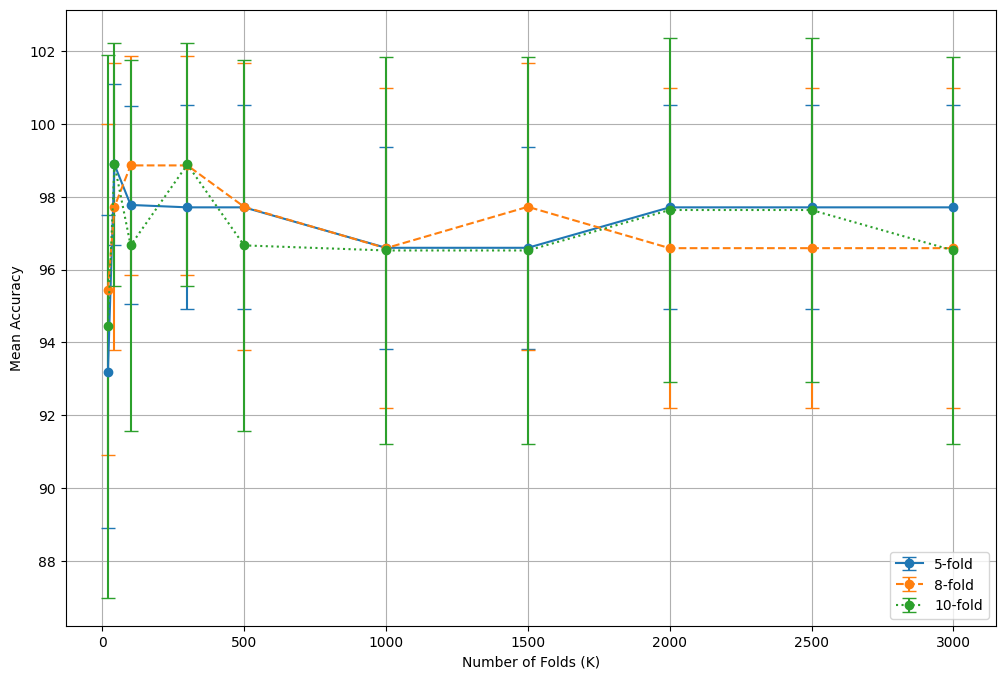

In [29]:
# Extract the data for plotting
x_values = results.keys()
mean_5_fold = [item['5-fold-CV']['mean-accuracy'] for item in results.values()]
std_5_fold = [item['5-fold-CV']['standard-deviation'] for item in results.values()]
mean_8_fold = [item['8-fold-CV']['mean-accuracy'] for item in results.values()]
std_8_fold = [item['8-fold-CV']['standard-deviation'] for item in results.values()]
mean_10_fold = [item['10-fold-CV']['mean-accuracy'] for item in results.values()]
std_10_fold = [item['10-fold-CV']['standard-deviation'] for item in results.values()]

# Create a single plot for mean accuracy and standard deviation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.errorbar(x_values, mean_5_fold, yerr=std_5_fold, marker='o', label='5-fold', linestyle='-', capsize=5)
plt.errorbar(x_values, mean_8_fold, yerr=std_8_fold, marker='o', label='8-fold', linestyle='--', capsize=5)
plt.errorbar(x_values, mean_10_fold, yerr=std_10_fold, marker='o', label='10-fold', linestyle=':', capsize=5)

plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [30]:
results

{20: {'accuracy': 94.444,
  'sensitivity': 100.0,
  '5-fold-CV': {'mean-accuracy': 93.203, 'standard-deviation': 4.303},
  '8-fold-CV': {'mean-accuracy': 95.455, 'standard-deviation': 4.545},
  '10-fold-CV': {'mean-accuracy': 94.444, 'standard-deviation': 7.454}},
 43: {'accuracy': 100.0,
  'sensitivity': 100.0,
  '5-fold-CV': {'mean-accuracy': 98.889, 'standard-deviation': 2.222},
  '8-fold-CV': {'mean-accuracy': 97.727, 'standard-deviation': 3.936},
  '10-fold-CV': {'mean-accuracy': 98.889, 'standard-deviation': 3.333}},
 100: {'accuracy': 100.0,
  'sensitivity': 100.0,
  '5-fold-CV': {'mean-accuracy': 97.778, 'standard-deviation': 2.722},
  '8-fold-CV': {'mean-accuracy': 98.864, 'standard-deviation': 3.007},
  '10-fold-CV': {'mean-accuracy': 96.667, 'standard-deviation': 5.092}},
 300: {'accuracy': 100.0,
  'sensitivity': 100.0,
  '5-fold-CV': {'mean-accuracy': 97.712, 'standard-deviation': 2.804},
  '8-fold-CV': {'mean-accuracy': 98.864, 'standard-deviation': 3.007},
  '10-fold-CV'